In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, pauli_error, depolarizing_error, amplitude_damping_error, phase_damping_error

### Construindo modelos de ruídos

In [3]:
# https://qiskit.github.io/qiskit-aer/tutorials/index.html#

In [4]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

noise_model = NoiseModel()

erro0 = amplitude_damping_error(0.01, 0)
erro1 = phase_damping_error(0.04)

twoAD = erro0.tensor(erro0)

In [5]:
noise_model.add_all_qubit_quantum_error(erro0, 'measure')
noise_model.add_all_qubit_quantum_error(erro0, ['x','h'])
noise_model.add_all_qubit_quantum_error(erro1, ['x'])
noise_model.add_all_qubit_quantum_error(twoAD, ['cx'])

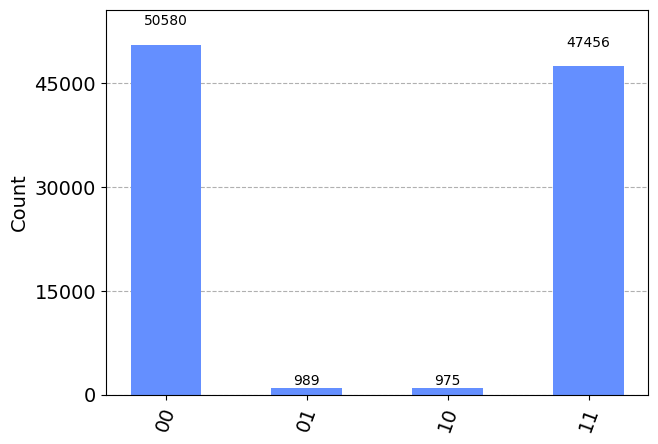

In [7]:
from qiskit_aer import AerSimulator

simulador_aer = AerSimulator()

qc_t = transpile(qc, backend=simulador_aer)
counts = simulador_aer.run(qc_t,shots=100000, noise_model=noise_model).result().get_counts()
plot_histogram(counts)